# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [3]:
# Calculate mean
math_mean = np.mean(data['math score'])
reading_mean =np.mean(data['reading score'])
writing_mean = np.mean(data['writing score'])

# Calculate standard deviation
math_std = np.std(data['math score'], ddof=1)
reading_std = np.std(data['reading score'], ddof=1)
writing_std = np.std(data['writing score'], ddof=1)

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.16308009600945
Mean Reading Score: 69.169, Std: 14.600191937252216
Mean Writing Score: 68.054, Std: 15.19565701086965


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [4]:
# Calculate probabilities
p_male = len(data[data['gender']=='male'])/len(data)
p_math_above_80 = len(data[data['math score']>80 ])/len(data)
p_male_and_math_above_80 = len(data[(data['gender']=='male') & (data['math score']>80)])/len(data)

# Union probability
p_union = p_male + p_math_above_80 - p_male_and_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")

Probability of Male or Math Score > 80: 0.5499999999999999


Calculate the probability that a student is Male and has a Math_Score above 80.

In [5]:
# Intersect probability
p_intersection = p_male_and_math_above_80
print(f"Probability of Male and Math Score > 80: {p_intersection}")

Probability of Male and Math Score > 80: 0.108


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [6]:
# Calculate conditional probability using Bayes' theorem
p_male_given_math_above_80 = p_intersection/p_math_above_80
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.6136363636363636


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

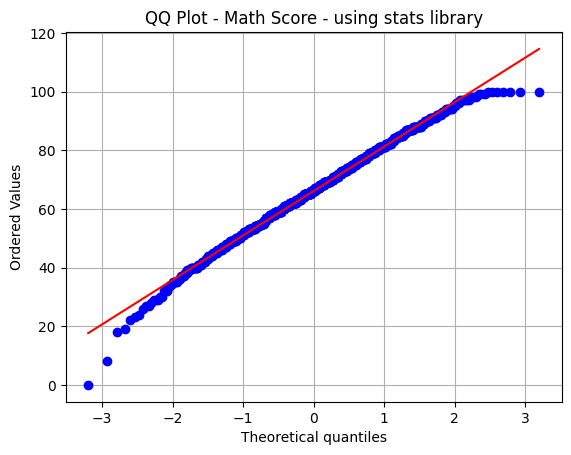

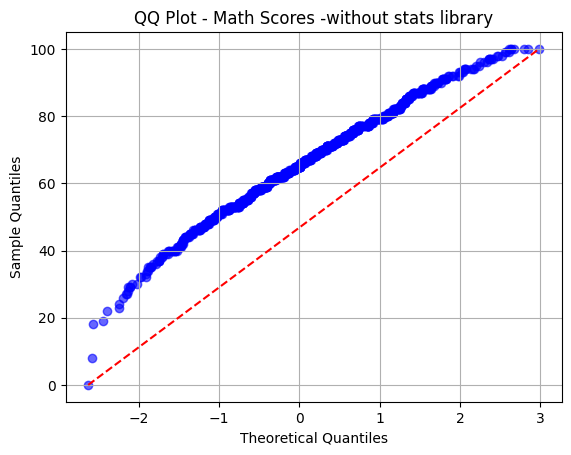

In [7]:
# QQ plot using stats library
math_scores = data['math score']
stats.probplot(math_scores, dist="norm", plot=plt)
plt.title('QQ Plot - Math Score - using stats library')
plt.grid(True)
plt.show()

# I didn't understand why the starting point of the straight line is different in the two plots, and which one is correct?
# QQ plot without stats library
sorted_scores = np.sort(math_scores)
n = len(math_scores)
quantiles = np.arange(1, n + 1) / n
theoretical_quantiles = np.quantile(np.random.normal(loc=0, scale=1, size=n), quantiles)
plt.scatter(theoretical_quantiles, sorted_scores, color='blue', alpha=0.6)
plt.plot([np.min(theoretical_quantiles), np.max(theoretical_quantiles)], 
           [np.min(sorted_scores), np.max(sorted_scores)], color='red', linestyle='--')  
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot - Math Scores -without stats library')
plt.grid(True)
plt.show()


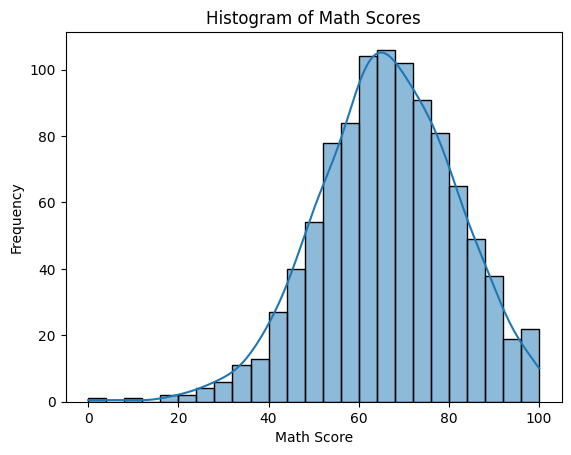

In [8]:
# Histogram
sns.histplot(math_scores, kde=True)
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Shapiro-Wilk test
statistic, p_value = stats.shapiro(math_scores)
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: The data does not appear to be normally distributed')
else:
     print('Fail to reject the null hypothesis: The data appears to be normally distributed.')

Shapiro-Wilk Test for Math Score: Statistic = 0.9931513872437832, p-value = 0.00014545719606603633
Reject the null hypothesis: The data does not appear to be normally distributed


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [23]:
# Calculate z-scores
data['Math_Score_z'] = (math_scores-math_mean)/math_std

# Remove noise (approximately a 95.45% confidence)
threshold = 2
cleaned_data = data[(data['Math_Score_z'] <= threshold) & (data['Math_Score_z'] >= -threshold)]
outlier=data[(data['Math_Score_z'] > threshold) | (data['Math_Score_z'] < -threshold)]
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")
print(f"Outlier data size: {outlier .shape}")


Original data size: (1000, 10)
Cleaned data size: (954, 10)
Outlier data size: (46, 10)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

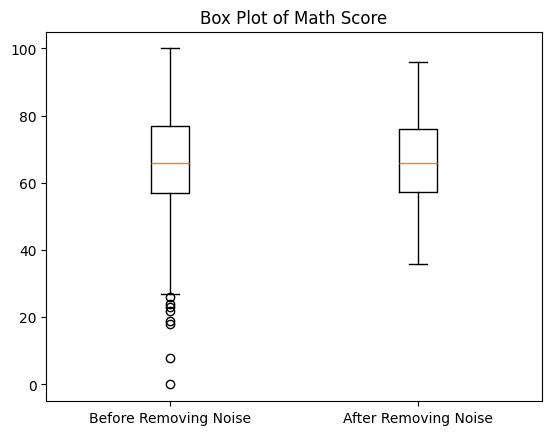

In [24]:
# Box plot
plt.boxplot(math_scores, positions=[1],labels=['Before Removing Noise'])
plt.boxplot(cleaned_data['math score'], positions=[2], labels=['After Removing Noise'])
plt.title('Box Plot of Math Score')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


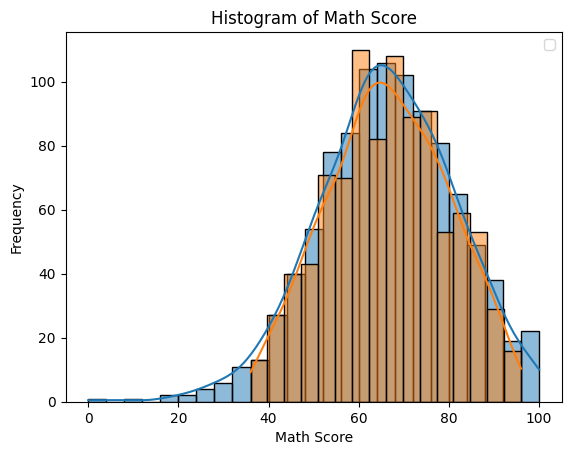

In [25]:
# Histogram
sns.histplot(math_scores, kde=True)
sns.histplot(cleaned_data['math score'], kde=True)
plt.title('Histogram of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

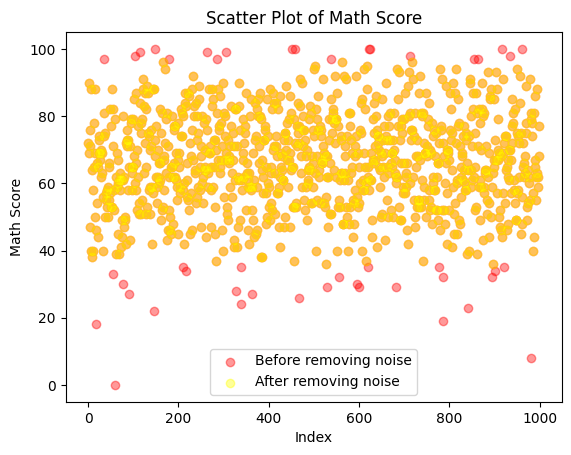

In [26]:
# Scatter plot
plt.scatter(data.index, math_scores, alpha=0.4, color='red', label='Before removing noise')
plt.scatter(cleaned_data.index, cleaned_data['math score'], alpha=0.4, color='yellow', label='After removing noise')
plt.title('Scatter Plot of Math Score')
plt.xlabel('Index')
plt.ylabel('Math Score')
plt.legend()
plt.show()

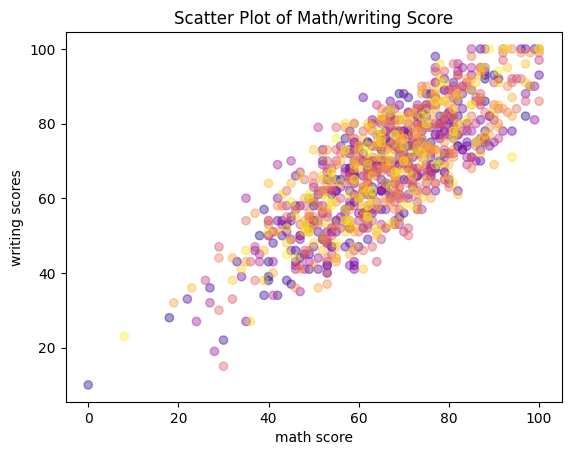

In [27]:
# Scatter plot
plt.scatter(math_scores, data['writing score'], alpha=0.4, c=data.index, cmap='plasma')
plt.title('Scatter Plot of Math/writing Score')
plt.xlabel('math score')
plt.ylabel('writing scores')
plt.show()



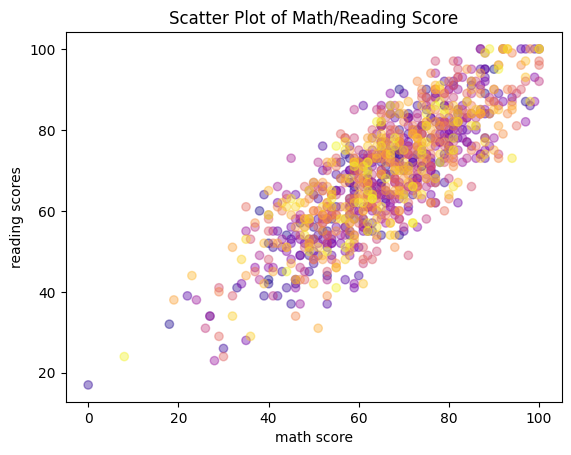

In [28]:
# Scatter plot
plt.scatter(math_scores, data['reading score'], alpha=0.4, c=data.index, cmap='plasma')
plt.title('Scatter Plot of Math/Reading Score')
plt.xlabel('math score')
plt.ylabel('reading scores')
plt.show()


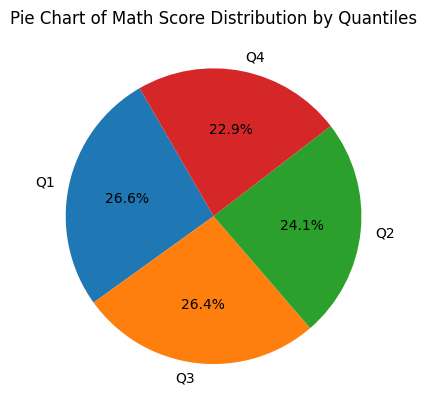

In [29]:
# Pie chart
Q1 = math_scores.quantile(0.25)
Q2 = math_scores.quantile(0.50)
Q3 = math_scores.quantile(0.75)


def categorize_score(score):
    if score <= Q1:
        return 'Q1'
    elif score <= Q2:
        return 'Q2'
    elif score <= Q3:
        return 'Q3'
    else:
        return 'Q4'

data['Quantile'] = math_scores.apply(categorize_score)
quantile_counts = data['Quantile'].value_counts()
plt.pie(quantile_counts, labels=quantile_counts.index ,autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of Math Score Distribution by Quantiles')
plt.show()

# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [30]:
male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']

t_statistic, p_value = stats.ttest_ind(male_math_score, female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the Math Scores of male and female students.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the Math Scores of male and female students.")

T-statistic: 4.384844297739353, p-value: 1.2899664913401746e-05
Reject the null hypothesis: There is a significant difference between the Math Scores of male and female students.


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [31]:
A = cleaned_data[cleaned_data['race/ethnicity'] == 'group A']['math score']
B = cleaned_data[cleaned_data['race/ethnicity'] == 'group B']['math score']
C = cleaned_data[cleaned_data['race/ethnicity'] == 'group C']['math score']

t_statistic, p_value = stats.f_oneway(A,B,C)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the Math Scores across different ethnicities.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the Math Scores across different ethnicities.")


T-statistic: 3.27526430952839, p-value: 0.03852214226481048
Reject the null hypothesis: There is a significant difference in the Math Scores across different ethnicities.


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

95% Confidence interval for mean Math Score: (65.69500030072132, 67.3762785252745)


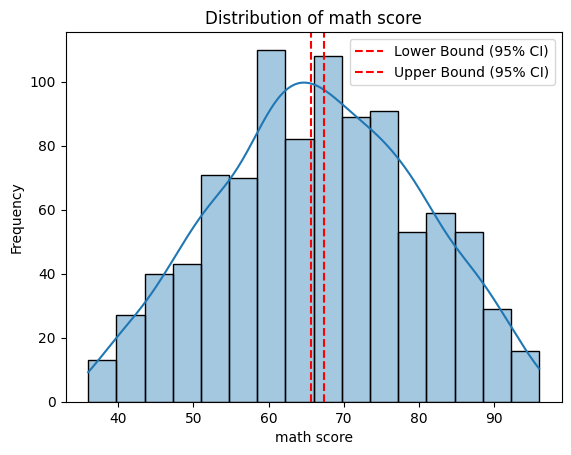

In [43]:
# Calculate mean and standard error of the mean
mean_score = cleaned_data['math score'].mean()
std_error = cleaned_data['math score'].std() / np.sqrt(len(cleaned_data))

confidence_level = .95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # critical value (two-tailed)

# Calculate the margin of error
margin_of_error = z * std_error

# Calculate the confidence interval
lower_bound = mean_score - margin_of_error
upper_bound = mean_score + margin_of_error

confidence_interval = (lower_bound, upper_bound)
print(f"95% Confidence interval for mean Math Score: {confidence_interval}")

# Visualize confidence interval
sns.histplot(cleaned_data['math score'], kde=True,alpha=0.4)
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound (95% CI)')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound (95% CI)')
plt.title('Distribution of math score')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.legend()
plt.show()
